## Monocentric city model: Initial setup

We will start with a simplified setup that considers only the *consumer* side of the consumption/housing decision.

---

### 1. Households and Preferences

- **Continuum of Identical Households**: Households are infinitesimally small and have total mass $L$; they are continuously distributed across space.
- **Cobb-Douglas Utility**: Preferences are given by:
  
  $$
  u(c, q) = c^{\alpha} q^{1 - \alpha}
  $$

  where:
  - $c$: consumption of a composite good (numéraire),
  - $q$: quantity of housing consumed,
  - $\alpha \in (0, 1)$: expenditure share on $c$.

- **Fixed Income and Commuting Cost**:
  - All households earn income $y$,
  - Commuting cost is linear in distance: $t \cdot x$, where $x$ is distance from the CBD.

- **Budget Constraint**:

  $$
  c + p(x) q = y - t x
  $$

  Households face a location-specific budget that trades off goods and housing.

---

### 2. Spatial Equilibrium Conditions

- **Utility Equalization**: All households achieve the same utility level \( U \) regardless of location, implying that households are indifferent across space.
- **Bid-Rent Curve**: Housing price adjusts with distance to maintain utility equality:

  $$
  p(x) = \left( \frac{\alpha^\alpha (1 - \alpha)^{1 - \alpha}}{U} \cdot (y - t x) \right)^{\frac{1}{1 - \alpha}}
  $$

- **Exogenous Housing Prices at the CBD**: In code, a value of \( p(0) \) is chosen to anchor the bid-rent function; this implicitly pins down the utility level \( U \).

---

### 3. Land and Space

- **Uniform, Flat Space**: Land is uniformly available and radially symmetric around the CBD.
- **One Household per Unit of Housing**: Each household occupies exactly one unit of housing (lot), and land is continuously divisible.
- **No Congestion or Overlap**: No spatial frictions or agglomeration effects; housing is allocated exclusively to one household per location.

---

### 4. Density and Population

- **Density from Housing Demand**:
  
  $$
  D(x) = \frac{1}{q(x)} = \frac{p(x)}{(1 - \alpha)(y - t x)}
  $$

- **Total Population** is the integral of density over the city:

  $$
  L = \int_0^{\bar{x}} 2\pi x D(x) \, dx
  $$

  where \( \bar{x} \) is the edge of the city, implicitly defined by the land rent condition (to be added).

---

### 5. No Developers or Housing Supply (Yet)

- **No Housing Production**: We have not yet modeled how housing is constructed or supplied — only how it is demanded.
- **No Building Costs or Land Markets**: There is no land rent or developer profit condition included yet.
- **Prices Adjust to Clear Consumer Demand**: Housing prices \( p(x) \) are determined solely from consumer behavior, assuming supply adjusts accordingly.

## Derivation of the Bid-Rent Curve from the Consumer Problem

We begin by deriving the **bid-rent curve** from the consumer’s optimization problem. A representative household chooses consumption of a composite good $c$ and housing $q$ to maximize:

$$
u(c, q) = c^{\alpha} q^{1 - \alpha}
$$

subject to a location-specific budget constraint:

$$
c + p(x) q = y - t x
$$

where:
- $p(x)$ is the housing price per unit of space at distance \( x \),
- $y$ is income,
- $t$ is the commuting cost per unit distance,
- $x$ is distance from the CBD.

The optimal consumption bundle satisfies:

$$
c(x) = \alpha (y - t x), \quad q(x) = \frac{(1 - \alpha)(y - t x)}{p(x)}
$$

Plugging these into the utility function gives:

$$
u(c(x), q(x)) = \left[ \alpha (y - t x) \right]^\alpha \left[ \frac{(1 - \alpha)(y - t x)}{p(x)} \right]^{1 - \alpha}
= \alpha^\alpha (1 - \alpha)^{1 - \alpha} (y - t x) \cdot p(x)^{-(1 - \alpha}
$$

Letting $U$ be the common utility level across all locations, spatial equilibrium requires:

$$
U = \alpha^\alpha (1 - \alpha)^{1 - \alpha} (y - t x) \cdot p(x)^{-(1 - \alpha)}
$$

Solving for the bid-rent function:

$$
p(x)^{1 - \alpha} = \frac{\alpha^\alpha (1 - \alpha)^{1 - \alpha} (y - t x)}{U}
\quad \Rightarrow \quad
p(x) = \left( \frac{\alpha^\alpha (1 - \alpha)^{1 - \alpha}}{U} \cdot (y - t x) \right)^{\frac{1}{1 - \alpha}}
$$

Thus, the **bid-rent curve** is proportional to $(y - t x)^{1 / (1 - \alpha)}$, and declines with distance from the CBD. The curve is steeper when \( \alpha \) is small (i.e., consumers are more sensitive to housing costs).

Finally, the slope of the bid-rent curve is:

$$
p'(x) = - \frac{t}{y - t x} \cdot \frac{1}{1 - \alpha} \cdot p(x)
$$

This shows that the rate of price decline depends on commuting cost $t$, income $y$, and the elasticity parameter $\alpha$.


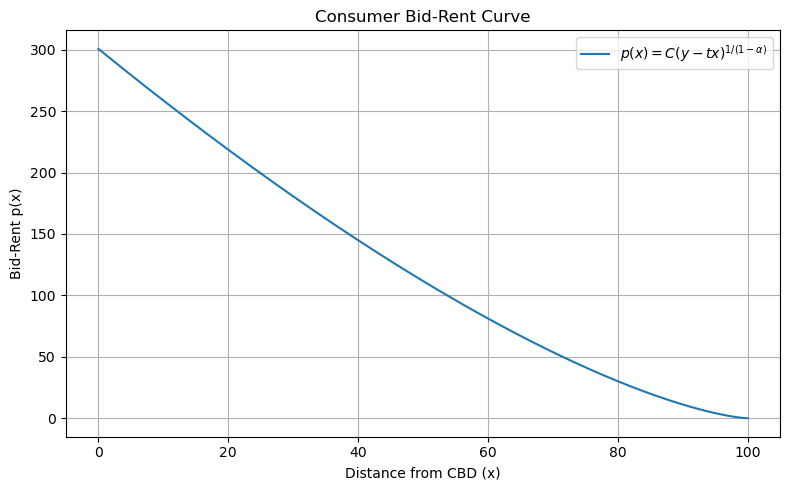

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.3        # Share of income spent on the composite good
y = 100            # Income
t = 1              # Commuting cost per unit distance
U = 1.0            # Normalization constant for bid-rent (can adjust to match p(0))

C = ( (alpha**alpha * (1 - alpha)**(1 - alpha)) / U ) ** (1 / (1 - alpha))

# Distance range from CBD (avoid division by zero at y/t)
x_vals = np.linspace(0, y / t - 1e-3, 300)

# Bid-rent function from utility equalization
def bid_rent_curve(x, alpha=alpha, y=y, t=t, C=C):
    """
    Compute the consumer bid-rent curve:
    p(x) = C · (y - t x)^(1 / (1 - alpha))
    """
    return C * (y - t * x) ** (1 / (1 - alpha))

# Evaluate p(x) across distances
p_vals = bid_rent_curve(x_vals)

# Plot bid-rent curve
plt.figure(figsize=(8, 5))
plt.plot(x_vals, p_vals, label=fr"$p(x) = C (y - tx)^{{1/(1-\alpha)}}$")
plt.xlabel("Distance from CBD (x)")
plt.ylabel("Bid-Rent p(x)")
plt.title("Consumer Bid-Rent Curve")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Closing the Model with $(L, r_A)$: Land Rent and Housing Capacity

To solve for equilibrium, we now introduce **land rent** and the constraint on how much housing can be built at each location.

---

### 🏙 The Edge of the City

At the city’s outer boundary, land must be just indifferent between being used for housing and some alternative (e.g., agriculture). This gives us a **boundary condition**:

$$
r(\bar{x}) = r_A
$$

where:
- $\bar{x}$ is the distance to the edge of the city,
- $r(x)$ is the land rent at distance $x$,
- $r_A$ is the constant value of land in its outside (non-urban) use.

This condition helps determine **how far the city extends**.

---

### 🧱 Housing Intensity and “Square Feet per Block”

We now assume that each location can support a fixed amount of built housing per unit of land:

$$
\varphi = \text{square feet of housing per unit of land}
$$

You can think of $\varphi$ as reflecting:
- local zoning rules,
- the built environment (e.g., block layout or max height),
- or simply how dense a location is allowed to be.

It’s **not** a technology, but a **spatial constraint**: each “block” can host $\varphi$ square feet of floor space.

---

### 💰 Land Rent from Consumer Willingness to Pay

We assume competitive builders, and for simplicity, we normalize the cost of construction to zero:

$$
i = 0
$$

Developers earn zero profit, so all housing revenue goes to the landowner. Therefore:

$$
r(x) = \varphi \cdot p(x)
$$

This means land is more valuable in locations where consumers are willing to pay higher housing prices. The **land rent schedule $r(x)$ is fully determined by the bid-rent function $p(x)$**.

---

We will now use this expression for $r(x)$, together with the boundary condition and the population constraint, to solve for equilibrium city size and land use.


In [3]:
from scipy.integrate import quad
from scipy.optimize import root_scalar

# -------------------------
# PARAMETERS FOR EQUILIBRIUM CLOSURE
# -------------------------

L_target = 1000     # Target population
r_A = 1.0           # Agricultural land rent (reservation land rent)
varphi = 2.0        # Land per household (reciprocal of density)

# -------------------------
# CONSUMER BID-RENT FUNCTION (parameterized by p0)
# -------------------------

def bid_rent_from_p0(x, p0, alpha, y, t):
    """
    Computes p(x) given p(0) and Cobb-Douglas utility.
    """
    return p0 * ((y - t * x) / y) ** (1 / (1 - alpha))


# -------------------------
# LAND RENT FUNCTION
# -------------------------

def land_rent(x, p0, alpha, y, t, varphi):
    """
    Computes land rent r(x) = varphi * p(x)
    """
    return varphi * bid_rent_from_p0(x, p0, alpha, y, t)


# -------------------------
# CITY EDGE GIVEN p0: solves r(x̄) = r_A
# -------------------------

def find_xbar(p0, t, alpha, y, r_A, varphi):
    """
    Solves for city boundary x̄ where r(x̄) = r_A ⇨ p(x̄) = r_A / varphi
    """
    target = r_A / varphi

    def residual(x):
        return bid_rent_from_p0(x, p0, alpha, y, t) - target

    # Ensure we don't evaluate exactly at y/t
    result = root_scalar(residual, bracket=[0, y / t - 1e-4], method='brentq')

    if not result.converged:
        raise RuntimeError("Failed to solve for x̄")

    return result.root


# -------------------------
# DENSITY FUNCTION
# -------------------------

def density(x, p0, alpha, y, t):
    """
    Computes population density D(x) = 1 / q(x)
    """
    px = bid_rent_from_p0(x, p0, alpha, y, t)
    return px / ((1 - alpha) * (y - t * x))


# -------------------------
# POPULATION IMPLIED BY p0
# -------------------------

def compute_Lhat(p0, t, alpha, y, r_A, varphi):
    """
    Integrates density from 0 to x̄ to compute implied population L̂(p₀)
    """
    xbar = find_xbar(p0, t, alpha, y, r_A, varphi)

    integrand = lambda x: 2 * np.pi * x * density(x, p0, alpha, y, t)

    L_hat, _ = quad(integrand, 0, xbar)

    return L_hat


# -------------------------
# SOLVER: EQUILIBRIUM p₀* AND x̄ GIVEN (L, r_A)
# -------------------------

def solve_equilibrium_p0(L_target, r_A, varphi, t, alpha, y):
    """
    Solves for p₀ such that population L̂(p₀) = L_target
    and r(x̄) = r_A at the city boundary.
    """

    # Safe lower bound: must exceed r_A / varphi to allow city to exist
    eps = 1e-6
    p0_min = r_A / varphi + eps
    p0_max = 200.0  # Arbitrary upper bound (ensures tiny city)

    def objective(p0):
        return compute_Lhat(p0, t, alpha, y, r_A, varphi) - L_target

    result = root_scalar(objective, bracket=[p0_min, p0_max], method='brentq')

    if not result.converged:
        raise RuntimeError("Failed to solve for equilibrium p₀")

    p0_star = result.root
    xbar_star = find_xbar(p0_star, t, alpha, y, r_A, varphi)

    return p0_star, xbar_star

# This function computes the utility level at the city boundary given p₀
def compute_Ubar(p0, alpha, y):
    c0 = alpha * y
    q0 = (1 - alpha) * y / p0
    return c0**alpha * q0**(1 - alpha)

# -------------------------
# RUN SOLVER
# -------------------------

p0_star, xbar_star = solve_equilibrium_p0(L_target, r_A, varphi, t, alpha, y)

Ubar_star = compute_Ubar(p0_star, alpha, y)

print(f"Equilibrium CBD housing price p₀* = {p0_star:.3f}")
print(f"City boundary x̄ = {xbar_star:.3f}")


Equilibrium CBD housing price p₀* = 4.936
City boundary x̄ = 79.866


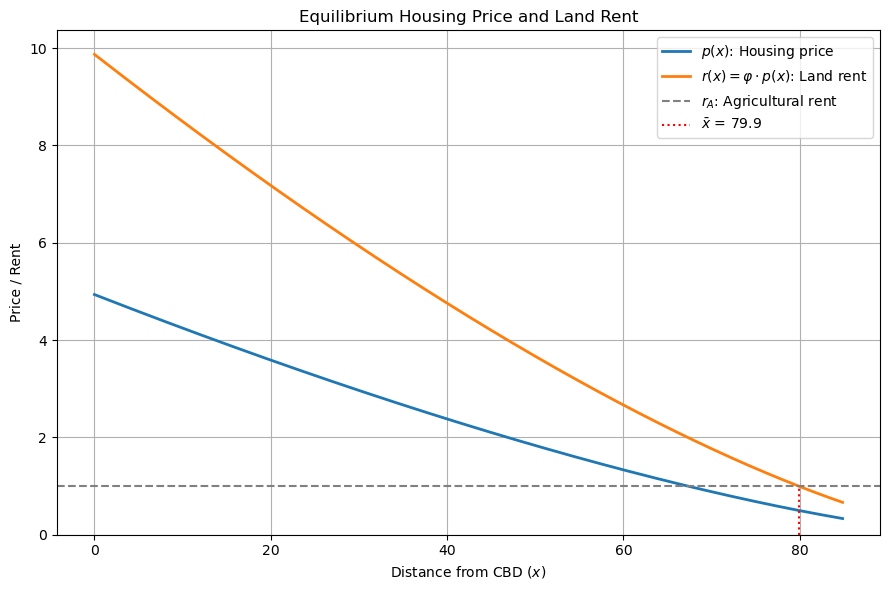

Target population L = 1000
Implied population L̂(p₀*) = 1000.0000


In [4]:
# Extend x slightly beyond city boundary for visual context
x_plot = np.linspace(0, xbar_star + 5, 400)
p_plot = bid_rent_from_p0(x_plot, p0_star, alpha, y, t)
r_plot = varphi * p_plot

# Create the figure
plt.figure(figsize=(9, 6))
plt.plot(x_plot, p_plot, label="$p(x)$: Housing price", linewidth=2)
plt.plot(x_plot, r_plot, label="$r(x) = \\varphi \\cdot p(x)$: Land rent", linewidth=2)
plt.axhline(r_A, color="gray", linestyle="--", label="$r_A$: Agricultural rent")

# Add a short vertical marker at the city boundary (doesn't extend all the way up)
plt.vlines(xbar_star, ymin=0, ymax=r_A, color="red", linestyle=":", label=f"$\\bar{{x}}$ = {xbar_star:.1f}")

# Axis and layout
plt.xlabel("Distance from CBD ($x$)")
plt.ylabel("Price / Rent")
plt.title("Equilibrium Housing Price and Land Rent")
plt.ylim(bottom=0)  # Include zero on the vertical axis
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------
# Compute and display implied population L̂
# ---------------
def implied_population(p0, xbar, alpha, y, t):
    integrand = lambda x: 2 * np.pi * x * density(x, p0, alpha, y, t)
    L_hat, _ = quad(integrand, 0, xbar)
    return L_hat

L_hat_check = implied_population(p0_star, xbar_star, alpha, y, t)

print(f"Target population L = {L_target}")
print(f"Implied population L̂(p₀*) = {L_hat_check:.4f}")


------------------------------------------
Comparison of base case with policy change
------------------------------------------
Variable        Base          New
--------        -----         -----
p₀*             4.936         8.849
Ubar            17.757        11.800
City size       79.866        86.620
------------------------------------------


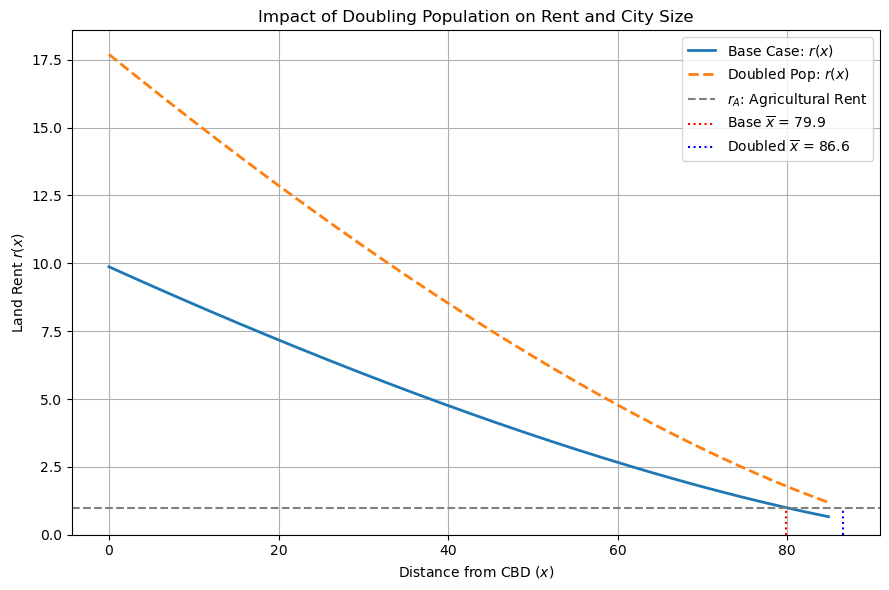

In [5]:
# --- Policy Experiment: Doubling Population and Plotting Impact on r(x) and City Size ---

# ---------------
# Set parameters and compute new equilibrium
# ---------------

# Double the population
L_new = 2 * L_target

# Solve for new CBD housing price p₀ that clears the market at L_new
p0_new, xbar_new = solve_equilibrium_p0(L_target=L_new, r_A=r_A, varphi=varphi, t=t, alpha=alpha, y=y)
r_new = varphi * bid_rent_from_p0(x_plot, p0_new, alpha, y, t)  # New r(x) profile

Ubar_new = compute_Ubar(p0_new, alpha, y)

print("------------------------------------------")
print("Comparison of base case with policy change")
print("------------------------------------------")
print("Variable        Base          New")
print("--------        -----         -----")
print(f"p₀*             {p0_star:.3f}         {p0_new:.3f}")
print(f"Ubar            {Ubar_star:.3f}        {Ubar_new:.3f}")
print(f"City size       {xbar_star:.3f}        {xbar_new:.3f}")
print("------------------------------------------")

# ---------------
# Plot base vs. higher population case
# ---------------

#  Plot results: r(x) for base and doubled population
plt.figure(figsize=(9, 6))

# Existing r(x) from previous solution (assumed already plotted/stored)
plt.plot(x_plot, r_plot, label="Base Case: $r(x)$", linewidth=2)

# New r(x) for doubled population
plt.plot(x_plot, r_new, linestyle='--', linewidth=2, label="Doubled Pop: $r(x)$")

# Plot horizontal agricultural rent
plt.axhline(r_A, color="gray", linestyle="--", label="$r_A$: Agricultural Rent")

# Add vertical markers for each city boundary
plt.vlines(xbar_star, ymin=0, ymax=r_A, color="red", linestyle=":", label=fr"Base $\overline{{x}}$ = {xbar_star:.1f}")
plt.vlines(xbar_new, ymin=0, ymax=r_A, color="blue", linestyle=":", label=fr"Doubled $\overline{{x}}$ = {xbar_new:.1f}")

# Plot formatting
plt.xlabel("Distance from CBD ($x$)")
plt.ylabel("Land Rent $r(x)$")
plt.title("Impact of Doubling Population on Rent and City Size")
plt.ylim(bottom=0)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


------------------------------------------
Comparison of base case with policy change
------------------------------------------
Variable        Base          New
--------        -----         -----
p₀*             4.936         1.900
Ubar            17.757        34.640
City size       79.866        121.444
------------------------------------------


C:\Users\hood_\AppData\Local\Temp\ipykernel_3936\102747023.py:20: RuntimeWarning: invalid value encountered in power
  return p0 * ((y - t * x) / y) ** (1 / (1 - alpha))


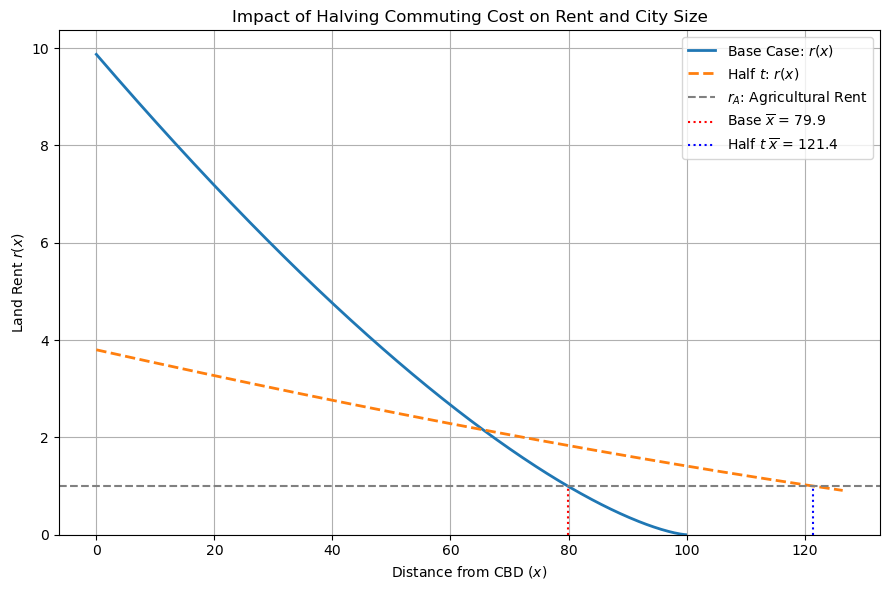

In [6]:
# --- Policy Experiment: Halving Commuting Cost t and Plotting Impact on r(x) and City Size ---

# ---------------
# Set parameters and compute new equilibrium
# ---------------

# Halve commuting cost
t_new = 0.5 * t

# Solve equilibrium for new t and same L_target
p0_new, xbar_new = solve_equilibrium_p0(L_target=L_target, r_A=r_A, varphi=varphi, t=t_new, alpha=alpha, y=y)
Ubar_new = compute_Ubar(p0_new, alpha, y)

# Compute new r(x)
x_plot = np.linspace(0, xbar_new + 5, 400)
p_new = bid_rent_from_p0(x_plot, p0_new, alpha, y, t_new)  # Use updated t
r_new = varphi * p_new

# Compute base case r(x) for the same x range
p_base = bid_rent_from_p0(x_plot, p0_star, alpha, y, t)  # Use original t
r_base = varphi * p_base

# Print comparison table
print("------------------------------------------")
print("Comparison of base case with policy change")
print("------------------------------------------")
print("Variable        Base          New")
print("--------        -----         -----")
print(f"p₀*             {p0_star:.3f}         {p0_new:.3f}")
print(f"Ubar            {Ubar_star:.3f}        {Ubar_new:.3f}")
print(f"City size       {xbar_star:.3f}        {xbar_new:.3f}")
print("------------------------------------------")

# Plot
plt.figure(figsize=(9, 6))

# Base r(x)
plt.plot(x_plot, r_base, label="Base Case: $r(x)$", linewidth=2)

# New r(x)
plt.plot(x_plot, r_new, linestyle='--', linewidth=2, label="Half $t$: $r(x)$")

# Agricultural rent
plt.axhline(r_A, color="gray", linestyle="--", label="$r_A$: Agricultural Rent")

# Vertical lines
plt.vlines(xbar_star, ymin=0, ymax=r_A, color="red", linestyle=":", label=fr"Base $\overline{{x}}$ = {xbar_star:.1f}")
plt.vlines(xbar_new, ymin=0, ymax=r_A, color="blue", linestyle=":", label=fr"Half $t$ $\overline{{x}}$ = {xbar_new:.1f}")

# Layout
plt.xlabel("Distance from CBD ($x$)")
plt.ylabel("Land Rent $r(x)$")
plt.title("Impact of Halving Commuting Cost on Rent and City Size")
plt.ylim(bottom=0)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Extension: Cobb-Douglas Housing Production

We now introduce a more realistic **firm side** where housing is produced using land and materials through a Cobb-Douglas production function.

---

### 🏗️ Housing Production Technology

Housing developers produce housing using:
- **Land** $N$ (per unit of geographic space)
- **Materials/Capital** $i$ (construction inputs)

The production function is:
$$
\varphi(N, i) = A \cdot N^{\beta} \cdot i^{1-\beta}
$$

where:
- $A > 0$ is total factor productivity
- $\beta \in (0,1)$ is the land share in production
- $\varphi$ is the amount of housing floor space produced per unit of geographic land

---

### 💰 Developer Profit Maximization

Developers are **price-takers** in all markets:
- Housing sells at price $p(x)$ per unit of floor space
- Land rents at price $r(x)$ per unit of geographic space
- Materials cost $w$ per unit (constant across space)

**Profit per unit of geographic land** at location $x$:
$$
\pi(x) = p(x) \cdot \varphi(N, i) - r(x) \cdot N - w \cdot i
$$

**First-order conditions** for optimal $N$ and $i$:
$$
\frac{\partial \pi}{\partial N} = p(x) \cdot A \beta N^{\beta-1} i^{1-\beta} - r(x) = 0
$$
$$
\frac{\partial \pi}{\partial i} = p(x) \cdot A (1-\beta) N^{\beta} i^{-\beta} - w = 0
$$

---

### 📐 Analytical Solution

From the FOCs, we can solve for optimal input demands:

**Land demand per unit of geographic space:**
$$
N^*(x) = \left( \frac{p(x) A \beta}{r(x)} \right)^{\frac{1}{1-\beta}} \left( \frac{(1-\beta)}{w} \right)^{\frac{1-\beta}{\beta}}
$$

**Materials demand per unit of geographic space:**
$$
i^*(x) = \left( \frac{p(x) A (1-\beta)}{w} \right)^{\frac{1}{\beta}} \left( \frac{\beta}{r(x)} \right)^{\frac{1-\beta}{\beta}}
$$

**Housing production per unit of geographic space:**
$$
\varphi^*(x) = A \left[ N^*(x) \right]^{\beta} \left[ i^*(x) \right]^{1-\beta}
$$

After substitution and simplification:
$$
\varphi^*(x) = A^{\frac{1}{\beta}} \beta^{\beta} (1-\beta)^{1-\beta} \left( \frac{p(x)}{r(x)^{\beta} w^{1-\beta}} \right)^{\frac{1}{\beta}}
$$

---

### 🎯 Zero-Profit Condition

With **free entry**, developers earn zero profit in equilibrium:
$$
\pi(x) = p(x) \cdot \varphi^*(x) - r(x) \cdot N^*(x) - w \cdot i^*(x) = 0
$$

This gives us the **land rent function**:
$$
r(x) = \frac{p(x) \cdot \varphi^*(x) - w \cdot i^*(x)}{N^*(x)}
$$

After substituting the optimal choices and using the zero-profit condition:
$$
r(x) = A^{\frac{1}{\beta}} \beta^{\frac{\beta}{1-\beta}} (1-\beta) \left( \frac{p(x)}{w} \right)^{\frac{1-\beta}{\beta}} w^{\frac{1-\beta}{\beta}}
$$

Simplifying:
$$
r(x) = K \cdot p(x)^{\frac{1-\beta}{\beta}}
$$

where $K = A^{\frac{1}{\beta}} \beta^{\frac{\beta}{1-\beta}} (1-\beta) w^{\frac{1-\beta}{\beta}}$ is a constant.

---

### 🔄 Equilibrium System

The equilibrium is now determined by:

1. **Consumer bid-rent:** $p(x) = p_0 \left( \frac{y-tx}{y} \right)^{\frac{1}{1-\alpha}}$

2. **Land rent from zero-profit:** $r(x) = K \cdot p(x)^{\frac{1-\beta}{\beta}}$

3. **Boundary condition:** $r(\bar{x}) = r_A$

4. **Population constraint:** $L = \int_0^{\bar{x}} 2\pi x D(x) dx$ where $D(x) = \varphi^*(x) / q(x)$

This system can be solved numerically for equilibrium $p_0$ and $\bar{x}$.

In [7]:
# -------------------------
# COBB-DOUGLAS HOUSING PRODUCTION MODEL - NUMERICAL IMPLEMENTATION
# -------------------------

# Additional parameters for housing production
A = 1.0          # Total factor productivity
beta = 0.4       # Land share in production (< 1)
w = 2.0          # Materials/capital cost (constant)

# Constant K from the analytical solution
K = A**(1/beta) * beta**(beta/(1-beta)) * (1-beta) * w**((1-beta)/beta)

print(f"Production parameters:")
print(f"A (TFP) = {A}")
print(f"β (land share) = {beta}")
print(f"w (materials cost) = {w}")
print(f"K (land rent constant) = {K:.4f}")
print()

# -------------------------
# UPDATED FUNCTIONS FOR COBB-DOUGLAS PRODUCTION
# -------------------------

def land_rent_cd(x, p0, alpha, y, t, K, beta):
    """
    Land rent under Cobb-Douglas production: r(x) = K * p(x)^((1-β)/β)
    """
    px = bid_rent_from_p0(x, p0, alpha, y, t)
    return K * px**((1-beta)/beta)

def housing_production_cd(x, p0, alpha, y, t, A, beta, w):
    """
    Optimal housing production: φ*(x) = A^(1/β) * β^β * (1-β)^(1-β) * (p(x)/(r(x)^β * w^(1-β)))^(1/β)
    """
    px = bid_rent_from_p0(x, p0, alpha, y, t)
    rx = land_rent_cd(x, p0, alpha, y, t, K, beta)
    
    # Avoid numerical issues
    if rx <= 0:
        return 0
        
    # Production function from analytical solution
    factor = A**(1/beta) * beta**beta * (1-beta)**(1-beta)
    return factor * (px / (rx**beta * w**(1-beta)))**(1/beta)

def find_xbar_cd(p0, t, alpha, y, r_A, K, beta):
    """
    Find city boundary where r(x̄) = r_A under Cobb-Douglas production
    """
    def residual(x):
        return land_rent_cd(x, p0, alpha, y, t, K, beta) - r_A
    
    # Ensure we don't evaluate exactly at y/t
    result = root_scalar(residual, bracket=[0, y/t - 1e-4], method='brentq')
    
    if not result.converged:
        raise RuntimeError("Failed to solve for x̄ in CD model")
    
    return result.root

def density_cd(x, p0, alpha, y, t, A, beta, w):
    """
    Population density under CD production: D(x) = φ*(x) / q(x)
    where q(x) is housing consumption per person
    """
    px = bid_rent_from_p0(x, p0, alpha, y, t)
    qx = (1 - alpha) * (y - t * x) / px  # Housing consumption per person
    phi_x = housing_production_cd(x, p0, alpha, y, t, A, beta, w)
    
    return phi_x / qx

def compute_Lhat_cd(p0, t, alpha, y, r_A, K, beta, A, w):
    """
    Compute implied population under CD production
    """
    xbar = find_xbar_cd(p0, t, alpha, y, r_A, K, beta)
    
    integrand = lambda x: 2 * np.pi * x * density_cd(x, p0, alpha, y, t, A, beta, w)
    
    L_hat, _ = quad(integrand, 0, xbar)
    
    return L_hat

def solve_equilibrium_cd(L_target, r_A, K, beta, A, w, t, alpha, y):
    """
    Solve for equilibrium p₀ under Cobb-Douglas production
    """
    # Need to find reasonable bounds for p0
    # Lower bound: p0 such that r(0) > r_A
    p0_min = (r_A / K)**(beta / (1-beta)) + 1e-6
    p0_max = 200.0
    
    def objective(p0):
        return compute_Lhat_cd(p0, t, alpha, y, r_A, K, beta, A, w) - L_target
    
    result = root_scalar(objective, bracket=[p0_min, p0_max], method='brentq')
    
    if not result.converged:
        raise RuntimeError("Failed to solve for equilibrium p₀ in CD model")
    
    p0_star = result.root
    xbar_star = find_xbar_cd(p0_star, t, alpha, y, r_A, K, beta)
    
    return p0_star, xbar_star

# -------------------------
# SOLVE EQUILIBRIUM
# -------------------------

print("Solving Cobb-Douglas production equilibrium...")
p0_cd, xbar_cd = solve_equilibrium_cd(L_target, r_A, K, beta, A, w, t, alpha, y)
Ubar_cd = compute_Ubar(p0_cd, alpha, y)

print(f"")
print(f"COMPARISON: Simple vs Cobb-Douglas Production")
print(f"=" * 50)
print(f"Model               Simple     Cobb-Douglas")
print(f"CBD price p₀        {p0_star:.3f}      {p0_cd:.3f}")
print(f"City boundary x̄     {xbar_star:.3f}      {xbar_cd:.3f}")
print(f"Utility level Ū     {Ubar_star:.3f}      {Ubar_cd:.3f}")
print(f"=" * 50)

Production parameters:
A (TFP) = 1.0
β (land share) = 0.4
w (materials cost) = 2.0
K (land rent constant) = 0.9213

Solving Cobb-Douglas production equilibrium...

COMPARISON: Simple vs Cobb-Douglas Production
Model               Simple     Cobb-Douglas
CBD price p₀        4.936      8.139
City boundary x̄     79.866      76.056
Utility level Ū     17.757      12.511


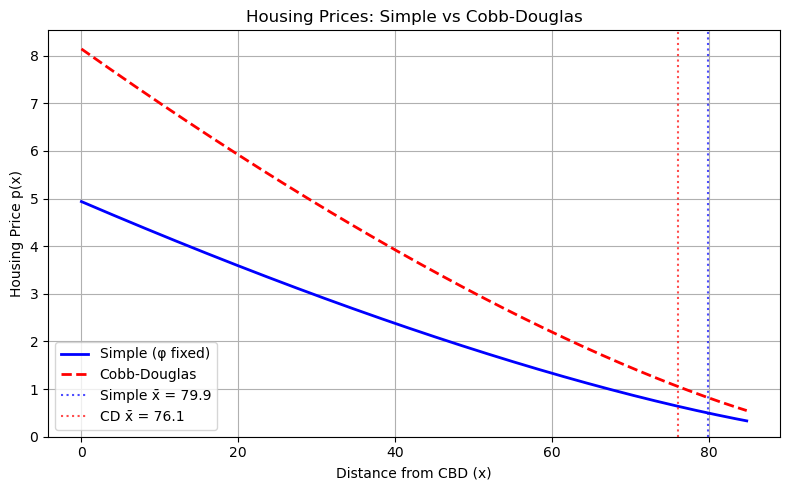

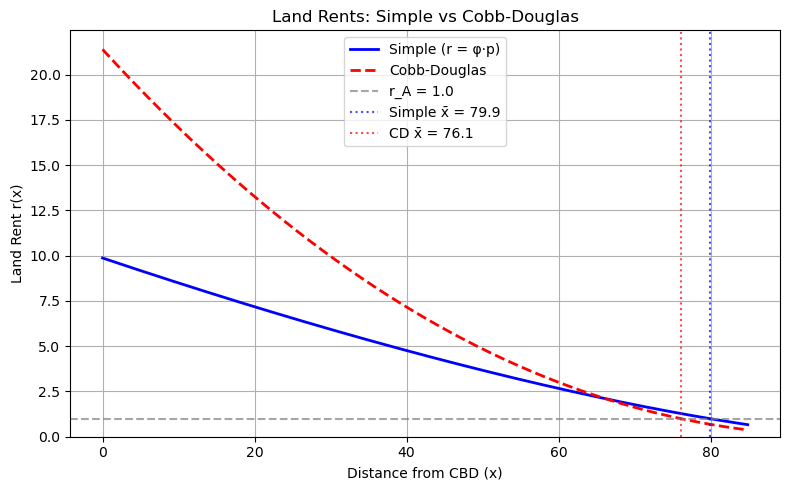

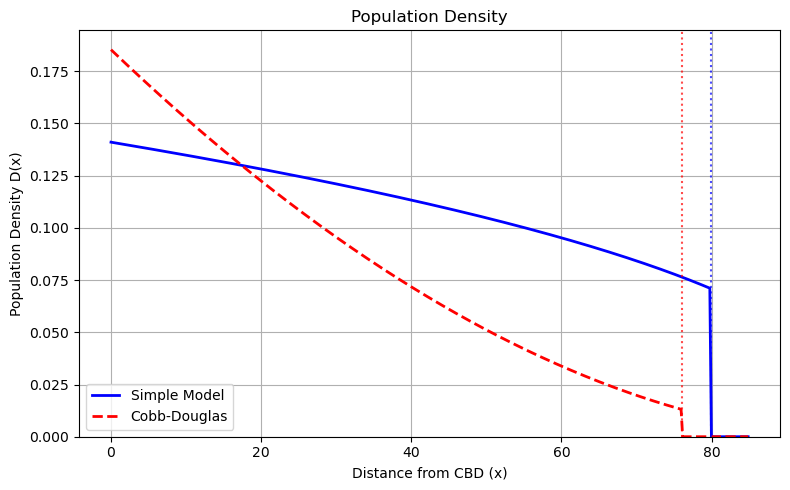

<Figure size 640x480 with 0 Axes>


Model Summary:
Simple Model:
  - Fixed housing intensity φ = 2.0
  - Linear relationship: r(x) = φ × p(x)
  - City boundary: 79.87
  - Utility level Ū = 17.757

Cobb-Douglas Model:
  - Endogenous housing intensity φ*(x)
  - Nonlinear relationship: r(x) = K × p(x)^{(1-β)/β}
  - City boundary: 76.06
  - Utility level Ū = 12.511
  - Land share parameter β = 0.4
  - Materials cost w = 2.0


In [13]:
# -------------------------
# VISUALIZATION: COMPARISON OF MODELS
# -------------------------

# Create x range that covers both city sizes
x_max = max(xbar_star, xbar_cd) + 5
x_plot_comp = np.linspace(0, x_max, 400)

# Compute profiles for both models
# Simple model
p_simple = bid_rent_from_p0(x_plot_comp, p0_star, alpha, y, t)
r_simple = varphi * p_simple

# Cobb-Douglas model  
p_cd_plot = bid_rent_from_p0(x_plot_comp, p0_cd, alpha, y, t)
r_cd_plot = land_rent_cd(x_plot_comp, p0_cd, alpha, y, t, K, beta)


# Plot 1: Housing Prices
plt.figure(figsize=(8, 5))
plt.plot(x_plot_comp, p_simple, label="Simple (φ fixed)", linewidth=2, color='blue')
plt.plot(x_plot_comp, p_cd_plot, label="Cobb-Douglas", linewidth=2, color='red', linestyle='--')
plt.axvline(xbar_star, color='blue', linestyle=':', alpha=0.7, label=f'Simple x̄ = {xbar_star:.1f}')
plt.axvline(xbar_cd, color='red', linestyle=':', alpha=0.7, label=f'CD x̄ = {xbar_cd:.1f}')
plt.xlabel("Distance from CBD (x)")
plt.ylabel("Housing Price p(x)")
plt.title("Housing Prices: Simple vs Cobb-Douglas")
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

# Plot 2: Land Rents
plt.figure(figsize=(8, 5))
plt.plot(x_plot_comp, r_simple, label="Simple (r = φ·p)", linewidth=2, color='blue')
plt.plot(x_plot_comp, r_cd_plot, label="Cobb-Douglas", linewidth=2, color='red', linestyle='--')
plt.axhline(r_A, color='gray', linestyle='--', alpha=0.7, label=f'r_A = {r_A}')
plt.axvline(xbar_star, color='blue', linestyle=':', alpha=0.7, label=f'Simple x̄ = {xbar_star:.1f}')
plt.axvline(xbar_cd, color='red', linestyle=':', alpha=0.7, label=f'CD x̄ = {xbar_cd:.1f}')
plt.xlabel("Distance from CBD (x)")
plt.ylabel("Land Rent r(x)")
plt.title("Land Rents: Simple vs Cobb-Douglas")
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

# -------------------------
# ADDITIONAL ANALYSIS: HOUSING PRODUCTION AND DENSITY
# -------------------------

# Compute housing production and density for CD model
phi_cd = np.array([housing_production_cd(x, p0_cd, alpha, y, t, A, beta, w) if x <= xbar_cd else 0 
                   for x in x_plot_comp])
density_cd_plot = np.array([density_cd(x, p0_cd, alpha, y, t, A, beta, w) if x <= xbar_cd else 0 
                           for x in x_plot_comp])

# For simple model, density is constant φ/q(x)
density_simple_plot = np.array([varphi * bid_rent_from_p0(x, p0_star, alpha, y, t) / ((1-alpha)*(y-t*x)) 
                               if x <= xbar_star and y-t*x > 0 else 0 for x in x_plot_comp])



# Plot 2: Population Density
plt.figure(figsize=(8, 5))
plt.plot(x_plot_comp, density_simple_plot, color='blue', linewidth=2, label="Simple Model")
plt.plot(x_plot_comp, density_cd_plot, color='red', linewidth=2, linestyle='--', label="Cobb-Douglas")
plt.axvline(xbar_star, color='blue', linestyle=':', alpha=0.7)
plt.axvline(xbar_cd, color='red', linestyle=':', alpha=0.7)
plt.xlabel("Distance from CBD (x)")
plt.ylabel("Population Density D(x)")
plt.title("Population Density")
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

print("\nModel Summary:")
print("=" * 40)
print("Simple Model:")
print(f"  - Fixed housing intensity φ = {varphi}")
print(f"  - Linear relationship: r(x) = φ × p(x)")
print(f"  - City boundary: {xbar_star:.2f}")
print(f"  - Utility level Ū = {Ubar_star:.3f}")  # <-- Added line
print()
print("Cobb-Douglas Model:")
print(f"  - Endogenous housing intensity φ*(x)")
print(f"  - Nonlinear relationship: r(x) = K × p(x)^{{(1-β)/β}}")
print(f"  - City boundary: {xbar_cd:.2f}")
print(f"  - Utility level Ū = {Ubar_cd:.3f}")    # <-- Added line
print(f"  - Land share parameter β = {beta}")
print(f"  - Materials cost w = {w}")

------------------------------------------
Cobb-Douglas: Base case vs Doubled Population
------------------------------------------
Variable        Base          Doubled
--------        -----         -------
p₀*             8.139         11.363
Ubar            12.511        9.905
City size       76.056        81.043
------------------------------------------


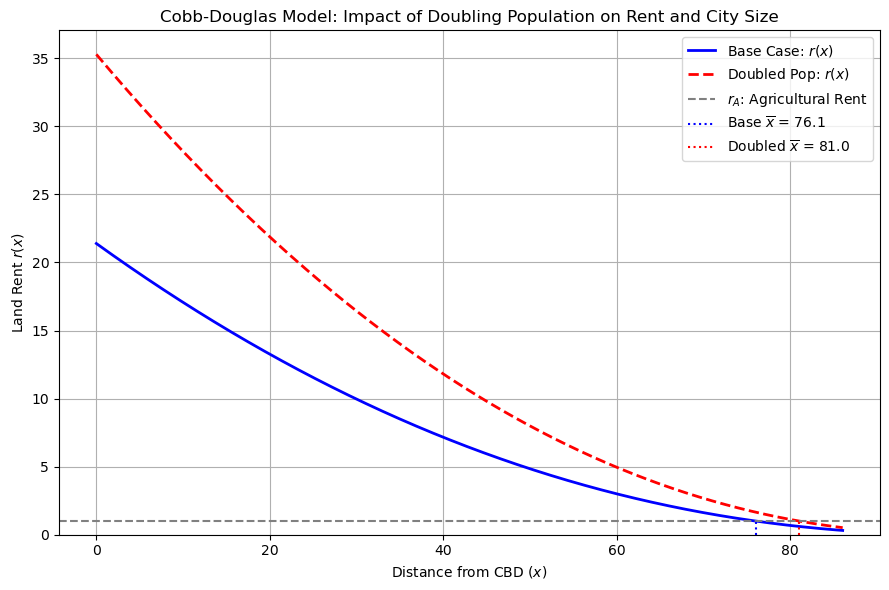

In [ ]:
# --- Policy Experiment: Doubling Population with Cobb-Douglas Production ---

# ---------------
# Set parameters and compute new equilibrium
# ---------------

# Double the population
L_new_cd = 2 * L_target

# Solve for new CBD housing price p₀ that clears the market at L_new under CD production
p0_new_cd, xbar_new_cd = solve_equilibrium_cd(L_target=L_new_cd, r_A=r_A, K=K, beta=beta, A=A, w=w, t=t, alpha=alpha, y=y)
Ubar_new_cd = compute_Ubar(p0_new_cd, alpha, y)

# Compute new profiles
x_plot_cd = np.linspace(0, max(xbar_cd, xbar_new_cd) + 5, 400)
p_new_cd = bid_rent_from_p0(x_plot_cd, p0_new_cd, alpha, y, t)
r_new_cd = land_rent_cd(x_plot_cd, p0_new_cd, alpha, y, t, K, beta)

# Compute base case profiles for the same x range
p_base_cd = bid_rent_from_p0(x_plot_cd, p0_cd, alpha, y, t)
r_base_cd = land_rent_cd(x_plot_cd, p0_cd, alpha, y, t, K, beta)

print("------------------------------------------")
print("Cobb-Douglas: Base case vs Doubled Population")
print("------------------------------------------")
print("Variable        Base          Doubled")
print("--------        -----         -------")
print(f"p₀*             {p0_cd:.3f}         {p0_new_cd:.3f}")
print(f"Ubar            {Ubar_cd:.3f}        {Ubar_new_cd:.3f}")
print(f"City size       {xbar_cd:.3f}        {xbar_new_cd:.3f}")
print("------------------------------------------")

# ---------------
# Plot base vs. doubled population case for CD model
# ---------------

plt.figure(figsize=(9, 6))

# Base r(x) for CD model
plt.plot(x_plot_cd, r_base_cd, label="Base Case: $r(x)$", linewidth=2, color='blue')

# New r(x) for doubled population
plt.plot(x_plot_cd, r_new_cd, linestyle='--', linewidth=2, label="Doubled Pop: $r(x)$", color='red')

# Plot horizontal agricultural rent
plt.axhline(r_A, color="gray", linestyle="--", label="$r_A$: Agricultural Rent")

# Add vertical markers for each city boundary
plt.vlines(xbar_cd, ymin=0, ymax=r_A, color="blue", linestyle=":", label=fr"Base $\overline{{x}}$ = {xbar_cd:.1f}")
plt.vlines(xbar_new_cd, ymin=0, ymax=r_A, color="red", linestyle=":", label=fr"Doubled $\overline{{x}}$ = {xbar_new_cd:.1f}")

# Plot formatting
plt.xlabel("Distance from CBD ($x$)")
plt.ylabel("Land Rent $r(x)$")
plt.title("Cobb-Douglas Model: Impact of Doubling Population on Rent and City Size")
plt.ylim(bottom=0)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [17]:
# -------------------------
# COMPREHENSIVE POLICY COMPARISON: SIMPLE vs COBB-DOUGLAS MODELS
# -------------------------

print("\n" + "="*70)
print("COMPREHENSIVE COMPARISON: Policy Effects on City Structure")
print("="*70)

# Calculate percentage changes for both models
# Simple model changes (use the doubled population variables from simple model)
simple_xbar_change = ((xbar_new - xbar_star) / xbar_star) * 100  # This should reference simple model's doubled pop
simple_U_change = ((Ubar_new - Ubar_star) / Ubar_star) * 100    # This should reference simple model's doubled pop  
simple_p0_change = ((p0_new - p0_star) / p0_star) * 100         # This should reference simple model's doubled pop

# But these variables were overwritten! We need to recalculate the simple model doubled population case:

# Recalculate simple model with doubled population to avoid variable conflicts
L_doubled = 2 * L_target
p0_simple_doubled, xbar_simple_doubled = solve_equilibrium_p0(L_target=L_doubled, r_A=r_A, varphi=varphi, t=t, alpha=alpha, y=y)
Ubar_simple_doubled = compute_Ubar(p0_simple_doubled, alpha, y)

# Now calculate correct percentage changes
simple_xbar_change = ((xbar_simple_doubled - xbar_star) / xbar_star) * 100
simple_U_change = ((Ubar_simple_doubled - Ubar_star) / Ubar_star) * 100
simple_p0_change = ((p0_simple_doubled - p0_star) / p0_star) * 100

# Cobb-Douglas model changes  
cd_xbar_change = ((xbar_new_cd - xbar_cd) / xbar_cd) * 100
cd_U_change = ((Ubar_new_cd - Ubar_cd) / Ubar_cd) * 100
cd_p0_change = ((p0_new_cd - p0_cd) / p0_cd) * 100

print(f"{'Metric':<20} {'Simple Model':<15} {'Cobb-Douglas':<15} {'Difference':<15}")
print("-" * 70)

# Absolute levels - Base case
print("BASE CASE:")
print(f"{'City boundary x̄':<20} {xbar_star:<15.2f} {xbar_cd:<15.2f} {xbar_cd-xbar_star:<15.2f}")
print(f"{'Utility level Ū':<20} {Ubar_star:<15.2f} {Ubar_cd:<15.2f} {Ubar_cd-Ubar_star:<15.2f}")
print(f"{'CBD price p₀':<20} {p0_star:<15.2f} {p0_cd:<15.2f} {p0_cd-p0_star:<15.2f}")

print("\nDOUBLED POPULATION:")
print(f"{'City boundary x̄':<20} {xbar_simple_doubled:<15.2f} {xbar_new_cd:<15.2f} {xbar_new_cd-xbar_simple_doubled:<15.2f}")
print(f"{'Utility level Ū':<20} {Ubar_simple_doubled:<15.2f} {Ubar_new_cd:<15.2f} {Ubar_new_cd-Ubar_simple_doubled:<15.2f}")
print(f"{'CBD price p₀':<20} {p0_simple_doubled:<15.2f} {p0_new_cd:<15.2f} {p0_new_cd-p0_simple_doubled:<15.2f}")

print("\nPERCENTAGE CHANGES (Doubled Pop vs Base):")
print(f"{'Δ City boundary':<20} {simple_xbar_change:<15.1f} {cd_xbar_change:<15.1f} {cd_xbar_change-simple_xbar_change:<15.1f}pp")
print(f"{'Δ Utility level':<20} {simple_U_change:<15.1f} {cd_U_change:<15.1f} {cd_U_change-simple_U_change:<15.1f}pp")
print(f"{'Δ CBD price':<20} {simple_p0_change:<15.1f} {cd_p0_change:<15.1f} {cd_p0_change-simple_p0_change:<15.1f}pp")


COMPREHENSIVE COMPARISON: Policy Effects on City Structure
Metric               Simple Model    Cobb-Douglas    Difference     
----------------------------------------------------------------------
BASE CASE:
City boundary x̄     79.87           76.06           -3.81          
Utility level Ū      17.76           12.51           -5.25          
CBD price p₀         4.94            8.14            3.20           

DOUBLED POPULATION:
City boundary x̄     86.62           81.04           -5.58          
Utility level Ū      11.80           9.91            -1.89          
CBD price p₀         8.85            11.36           2.51           

PERCENTAGE CHANGES (Doubled Pop vs Base):
Δ City boundary      8.5             6.6             -1.9           pp
Δ Utility level      -33.5           -20.8           12.7           pp
Δ CBD price          79.3            39.6            -39.7          pp
